In [439]:
import numpy as np
import pandas as pd

In [440]:
def diferencia_cos(t1, t2):

    # Definir los textos a comparar
    texto1 = t1
    texto2 = t2

    # Función para tokenizar y limpiar el texto


    def preprocess(text):
        text = text.lower().split()
        return [word.strip("°") for word in text]


    # Tokenizar y limpiar los textos
    tokens1 = preprocess(texto1)
    tokens2 = preprocess(texto2)

    # Remover palabras repetidas
    lenguaje = set(tokens1 + tokens2)

    # Generar vectores en 0
    v1 = np.zeros(len(lenguaje))
    v2 = np.zeros(len(lenguaje))


    # Contabilizar palabras en cada texto
    i = 0
    for token in lenguaje:
        v1[i] = tokens1.count(token)
        v2[i] = tokens2.count(token)
        i += 1

    acum_punto = 0
    acum_v1 = 0
    acum_v2 = 0
    for i in range(len(v1)):
        acum_punto += v1[i] * v2[i]
        acum_v1 += v1[i] * v1[i]
        acum_v2 += v2[i] * v2[i]

    sim = acum_punto / (np.sqrt(acum_v1) * np.sqrt(acum_v2))

    return sim


In [441]:
data = pd.read_csv('labels_clean.csv')


In [442]:
data['ResulComp'] = data.apply(
    lambda row: diferencia_cos(row['sub1'], row['sub2']), axis=1)


In [443]:
data


,sub1,sub2,problem,verdict,ResulComp
0,import java.io.PrintWriter ; import java.util....,import java.util. * ; import java.io. * ; publ...,19,0,0.960301
1,import java.util. * ; public class Soltion { p...,import java.util. * ; public class mentor1 { p...,20,0,0.962249
2,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000
3,import java.util. * ; import java.lang. * ; im...,import java.io.OutputStream ; import java.io.I...,6,0,0.964032
4,import java.math.BigDecimal ; import java.math...,import java.util. * ; public class Sol { publi...,15,0,0.951588
...,...,...,...,...,...
906,import java.io.BufferedReader ; import java.io...,import java.io.BufferedReader ; import java.io...,8,1,0.950360
907,import javax.print.attribute.standard.MediaSiz...,import java.util.Scanner ; public class Menora...,4,0,0.911860
908,import java.io. * ; import java.util. * ; publ...,import java.io.BufferedReader ; import java.io...,17,0,0.931571
909,import java.util. * ; import java.io. * ; publ...,import java.io. * ; import java.util. * ; publ...,15,1,0.963347


In [444]:
data["ResulComp"].min()

0.688787678232836

In [445]:
def asignar_verdict(level, result):
    if result > level:
        return 1
    else:
        return 0


In [446]:
for i in range(100):
    name = str(i/100)
    level = i/100
    data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level,x))
    

C:\Users\HP\AppData\Local\Temp\ipykernel_2512\238093246.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level,x))
C:\Users\HP\AppData\Local\Temp\ipykernel_2512\238093246.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[name] = data['ResulComp'].apply(lambda x: asignar_verdict(level,x))
C:\Users\HP\AppData\Local\Temp\ipykernel_2512\238093246.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [447]:
total_registros = len(data)
rangos = []
precisiones_rangos = []
for i in range(100):
    name = str(i/100)
    coincidencias = (data['verdict'] == data[name]).sum()
    precision = coincidencias / total_registros
    rangos.append(float(name))
    precisiones_rangos.append(precision)
    print("Precisión de", name, "es:",precision)


Precisión de 0.0 es: 0.27552140504939626
Precisión de 0.01 es: 0.27552140504939626
Precisión de 0.02 es: 0.27552140504939626
Precisión de 0.03 es: 0.27552140504939626
Precisión de 0.04 es: 0.27552140504939626
Precisión de 0.05 es: 0.27552140504939626
Precisión de 0.06 es: 0.27552140504939626
Precisión de 0.07 es: 0.27552140504939626
Precisión de 0.08 es: 0.27552140504939626
Precisión de 0.09 es: 0.27552140504939626
Precisión de 0.1 es: 0.27552140504939626
Precisión de 0.11 es: 0.27552140504939626
Precisión de 0.12 es: 0.27552140504939626
Precisión de 0.13 es: 0.27552140504939626
Precisión de 0.14 es: 0.27552140504939626
Precisión de 0.15 es: 0.27552140504939626
Precisión de 0.16 es: 0.27552140504939626
Precisión de 0.17 es: 0.27552140504939626
Precisión de 0.18 es: 0.27552140504939626
Precisión de 0.19 es: 0.27552140504939626
Precisión de 0.2 es: 0.27552140504939626
Precisión de 0.21 es: 0.27552140504939626
Precisión de 0.22 es: 0.27552140504939626
Precisión de 0.23 es: 0.2755214050493

In [448]:
max_precision = max(precisiones_rangos)
indice_max_precision = precisiones_rangos.index(max_precision)
max_precision

0.8265642151481888

In [449]:
indice = str(rangos[indice_max_precision])
indice


'0.98'

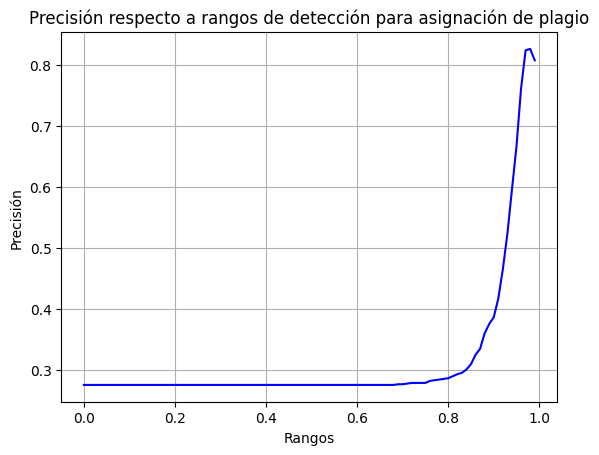

In [450]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = rangos
y = precisiones_rangos

# Crear el gráfico
plt.plot(x, y, color='blue')

# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()


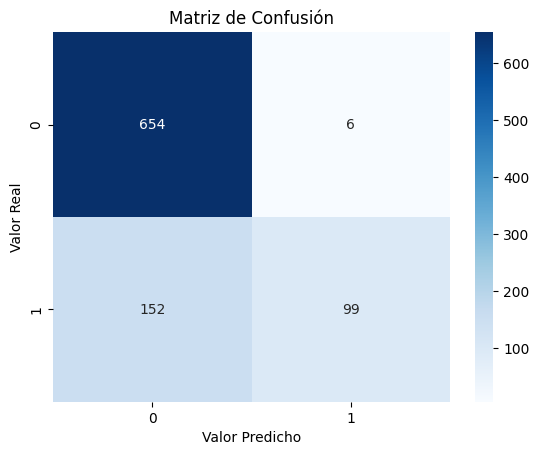

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supongamos que 'df' es tu dataframe y 'real_values' es la columna con los valores reales,
# mientras que 'predicted_values' es la columna con los valores predichos.


# Calcula la matriz de confusión
confusion = confusion_matrix(real_values, predicted_values)

# Crea un mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')

# Configura los ejes y el título del gráfico
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()


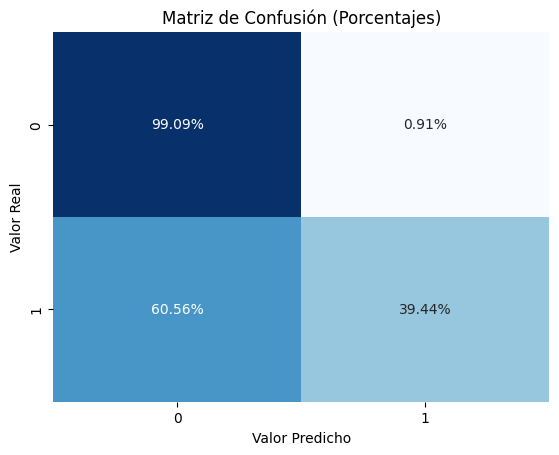

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

real_values = data['verdict']
predicted_values = data[indice]

# Calcula la matriz de confusión
confusion = confusion_matrix(real_values, predicted_values)

# Calcula los porcentajes dividiendo cada valor de la matriz por la suma de todos los valores
confusion_percent = confusion.astype(
    'float') / confusion.sum(axis=1)[:, np.newaxis]

# Crea un mapa de calor de la matriz de confusión con los porcentajes
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.2%', cbar=False)

# Configura los ejes y el título del gráfico
plt.xlabel('Valor Predicho')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Porcentajes)')

# Muestra el gráfico
plt.show()


In [453]:
datap = data

In [454]:
i = 1
precisiones = []
cortes = []
for i in range(100):
    datap = datap[datap["ResulComp"]>(i/100)]
    total_registros = len(datap)
    coincidencias = (datap['verdict'] == datap[indice]).sum()
    precision = coincidencias / total_registros
    precisiones.append(precision)
    cortes.append(i/100)
    print("coincidencias",coincidencias,"total_registros",total_registros)
    print("Precisión de", name, "es:", precision, "con corte en", (i/100))


coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.0
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.01
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.02
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.03
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.04
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.05
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.06
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.07
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.08
coincidencias 753 total_registros 911
Precisión de 0.99 es: 0.8265642151481888 con corte en 0.09
coincidencias 753 total_registr

In [455]:
max(precisiones)

0.9871794871794872

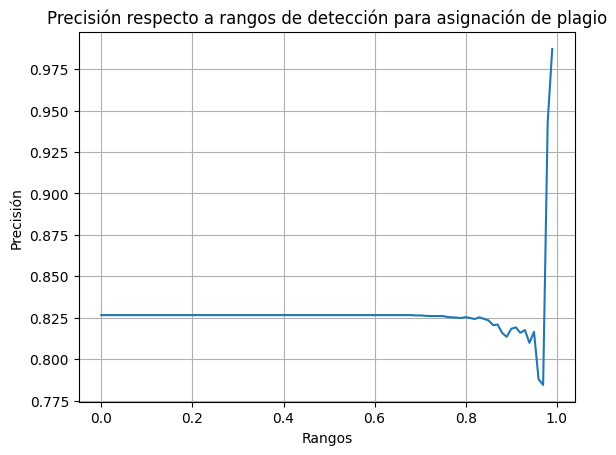

In [456]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = cortes
y = precisiones

# Crear el gráfico
plt.plot(x, y)


# Establecer título y etiquetas de los ejes
plt.title("Precisión respecto a rangos de detección para asignación de plagio")
plt.xlabel('Rangos')
plt.ylabel('Precisión')

plt.grid(True)


# Mostrar el gráfico
plt.show()


In [457]:
datap

,sub1,sub2,problem,verdict,ResulComp,0.0,0.01,0.02,0.03,0.04,...,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99
2,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12,import java.io.BufferedReader ; import java.io...,import java.io.BufferedReader ; import java.io...,8,1,0.999907,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
26,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
28,import java.util. * ; public class A { public ...,import java.util. * ; public class A { public ...,10,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,17,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
859,import java.io.DataInputStream ; import java.i...,import java.io.DataInputStream ; import java.i...,11,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
871,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,9,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,import java.io. * ; import java.util. * ; publ...,import java.io. * ; import java.util. * ; publ...,14,1,1.000000,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Comparación idf

In [458]:
import math



# Función para tokenizar y limpiar el texto


def preprocess(text):
    text = text.lower().split()

    return [word.strip(".?!¿,()--—_") for word in text]



# Calcular la frecuencia de término (TF)


def calculate_tf(tokens):
    tf = {}
    total_words = len(tokens)
    for word in tokens:
        tf[word] = tf.get(word, 0) + 1 / total_words
    return tf

# Calcular el IDF


def calculate_idf(tokens1, tokens2):
    idf = {}
    total_docs = 2
    unique_words = set(tokens1 + tokens2)
    for word in unique_words:
        count = 0
        if word in tokens1:
            count += 1
        if word in tokens2:
            count += 1
        idf[word] = math.log((total_docs / (count+1)))+1
    return idf

# Calcular el vector TF-IDF


def calculate_tfidf(tokens, tf, idf):
    tfidf = {}
    for word in tokens:
        tfidf[word] = tf[word] * idf[word]
    return tfidf


def cosine_similarity(vector_a, vector_b):
    dot_product = np.dot(vector_a, vector_b)
    norm_a = np.linalg.norm(vector_a)
    norm_b = np.linalg.norm(vector_b)
    cosine_similarity = dot_product / (norm_a * norm_b)
    return cosine_similarity


In [459]:
dataidf = pd.read_csv('labels_tokenized.csv')


In [460]:
def diferencia_cos_idf(t1,t2):
    texto1 = t1
    texto2 = t2
    tokens1 = preprocess(texto1)
    tokens2 = preprocess(texto2)

    # Calcular el TF-IDF para cada texto
    tf1 = calculate_tf(tokens1)
    tf2 = calculate_tf(tokens2)
    idf = calculate_idf(tokens1, tokens2)
    tfidf1 = calculate_tfidf(tokens1, tf1, idf)
    tfidf2 = calculate_tfidf(tokens2, tf2, idf)

    # Crear la lista de datos para el DataFrame
    data = []
    for word in sorted(set(tokens1 + tokens2), key=lambda x: tokens1.index(x) if x in tokens1 else tokens2.index(x)):
        tfidf1_value = tfidf1.get(word, 0)
        tfidf2_value = tfidf2.get(word, 0)
        data.append([word, tf1.get(word, 0), tf2.get(word, 0),
                    idf.get(word, 0), tfidf1_value, tfidf2_value])

    # Crear el DataFrame
    df = pd.DataFrame(data, columns=["Palabra", "Aparición en texto 1",
                    "Aparición en texto 2", "IDF", "TF(texto 1) * IDF", "TF(texto 2) * IDF"])
    
    # Ejemplo de uso
    vector1 = np.array(df['TF(texto 1) * IDF'])
    vector2 = np.array(df['TF(texto 2) * IDF'])

    distance = cosine_similarity(vector1, vector2)

    return distance
    
    


In [461]:
dataidf['ResulComp'] = dataidf.apply(
    lambda row: diferencia_cos_idf(row['sub1'], row['sub2']), axis=1)


In [462]:
for i in range(10):
    name = "range>0." + str(i)
    level = i/10
    dataidf[name] = dataidf['ResulComp'].apply(
        lambda x: asignar_verdict(level, x))


In [463]:
total_registros = len(dataidf)
for i in range(10):
    name = "range>0." + str(i)
    coincidencias = (dataidf['verdict'] == dataidf[name]).sum()
    precision = coincidencias / total_registros
    print("Precisión de", name, "es:", precision)


Precisión de range>0.0 es: 0.27552140504939626
Precisión de range>0.1 es: 0.27552140504939626
Precisión de range>0.2 es: 0.27552140504939626
Precisión de range>0.3 es: 0.27552140504939626
Precisión de range>0.4 es: 0.27552140504939626
Precisión de range>0.5 es: 0.27552140504939626
Precisión de range>0.6 es: 0.27552140504939626
Precisión de range>0.7 es: 0.27552140504939626
Precisión de range>0.8 es: 0.27552140504939626
Precisión de range>0.9 es: 0.27771679473106475
